# Adaline

## Functions

### Plotting Functions

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(func, X, target, padding=1, marker='o'):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()

    markers = f'r{marker}', f'b{marker}'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], markers[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, func(line_x))
    plt.show()

### Bipolar Step Function

In [ ]:
def bipstep(y, th=0):
  return 1 if y >= th else -1

### Adaline Training

In [ ]:
import sys

def adaline_fit(x, t, alpha=.1, max_err=.1, max_epoch=-1, verbose=False, draw=False):
  w = np.random.uniform(0, 1, len(x[0]) + 1)
  b = np.ones((len(x), 1))
  x = np.hstack((b, x))
  stop = False
  epoch = 0

  while not stop and (max_epoch == -1 or epoch < max_epoch):
    epoch += 1
    max_ch = -sys.maxsize

    if verbose:
      print('\nEpoch', epoch)

    for r, row in enumerate(x):
      y = np.dot(row, w)

      for i in range(len(row)):
        w_new = w[i] + alpha * (t[r] - y) * row[i]
        max_ch = max(abs(w[i] - w_new), max_ch)
        w[i] = w_new

      if verbose:
        print('Bobot:', w)

      if draw:
        plot(line(w), x, t)

    stop = max_ch < max_err

  return w,epoch


### Adaline Testing

In [ ]:
def adaline_predict(X, w):
  Y = []

  for x in X:
    y_in = w[0] + np.dot(x, w[1:])
    y = bipstep(y_in)
    Y.append(y)

  return Y

### Count Accuracy Function

In [ ]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]

  return sum(s) / len(a)

## Logics

### AND Logic


Epoch 1
Bobot: [0.34511062 0.55902392 0.60864192]


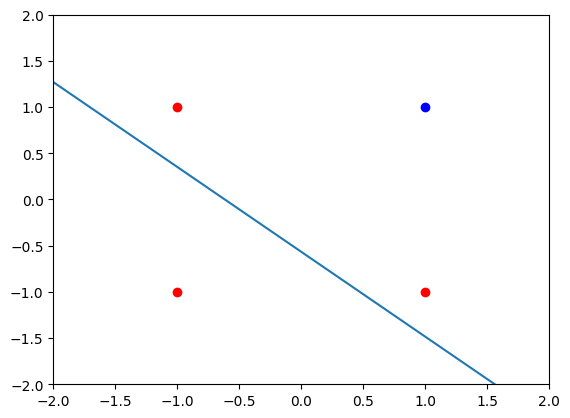

Bobot: [0.21556136 0.42947466 0.73819118]


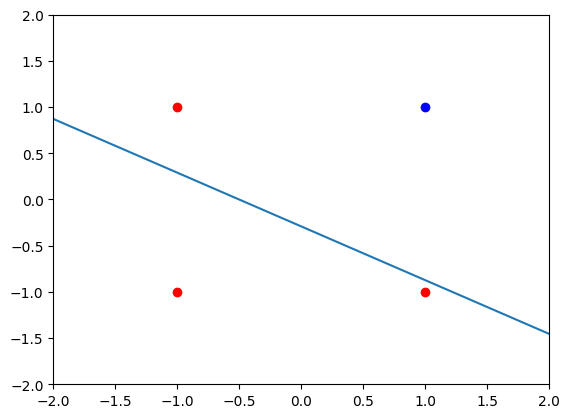

Bobot: [0.06313357 0.58190245 0.5857634 ]


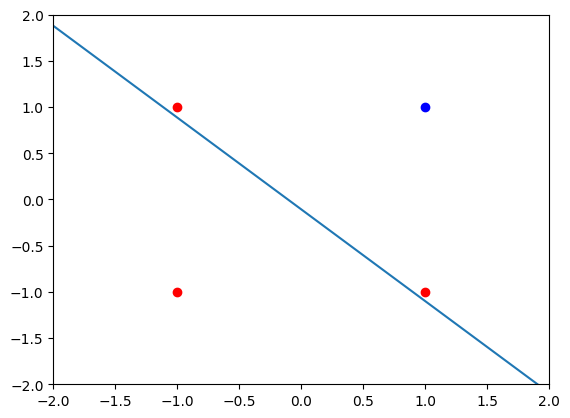

Bobot: [0.0735868  0.57144922 0.57531017]


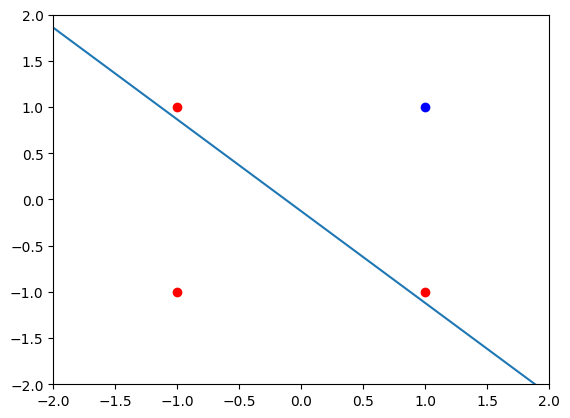


Epoch 2
Bobot: [0.05155218 0.5494146  0.55327555]


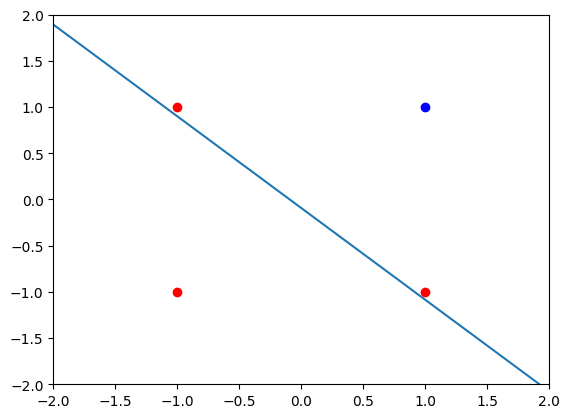

Bobot: [-0.05321695  0.44464548  0.65804467]


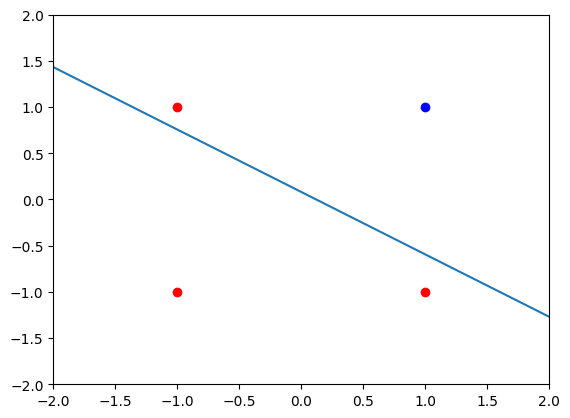

Bobot: [-0.16923517  0.5606637   0.54202645]


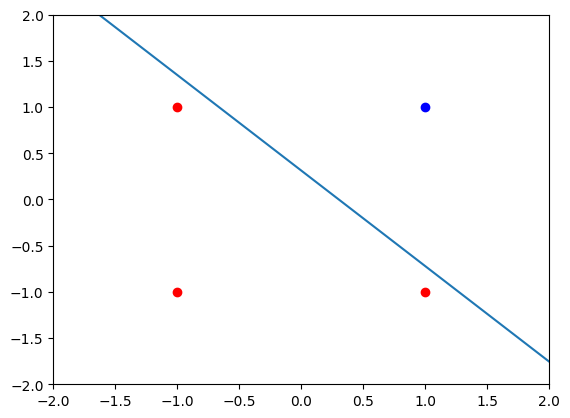

Bobot: [-0.14204264  0.53347117  0.51483392]


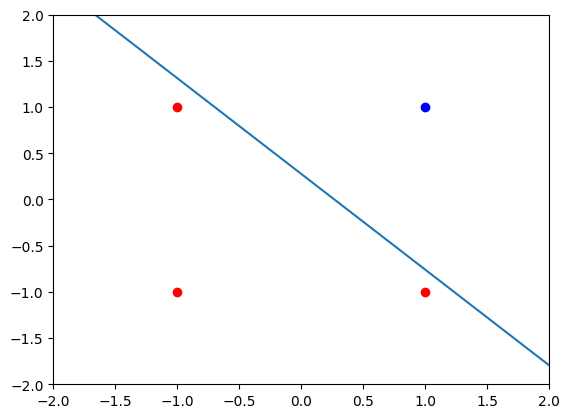


Epoch 3
Bobot: [-0.13266888  0.54284493  0.52420767]


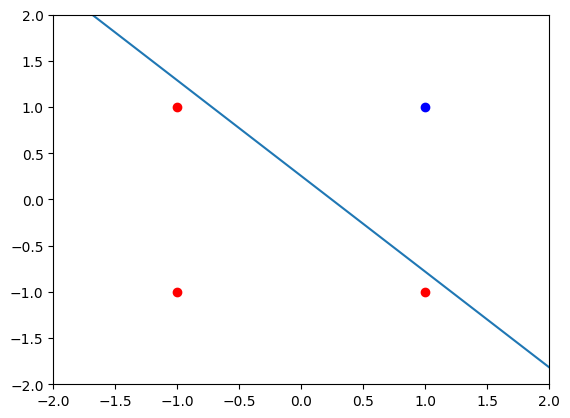

Bobot: [-0.22126572  0.45424809  0.61280451]


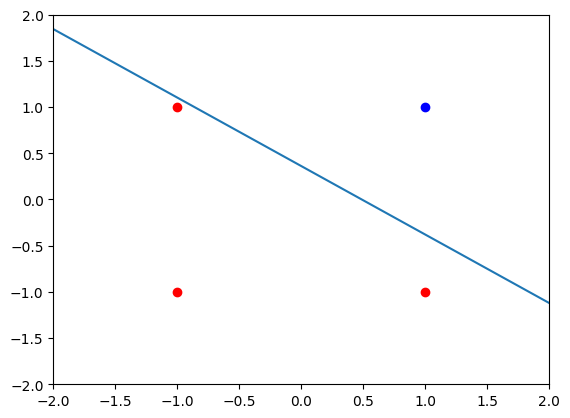

Bobot: [-0.31499479  0.54797716  0.51907544]


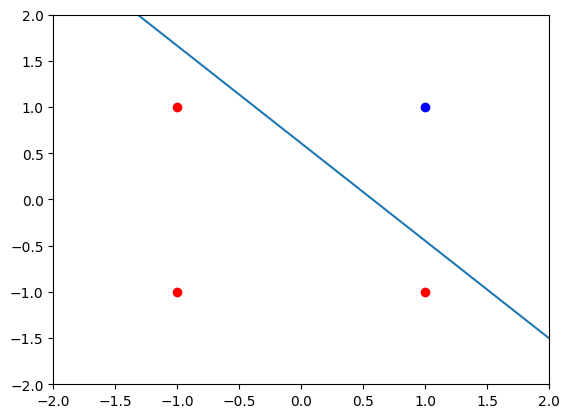

Bobot: [-0.27679005  0.50977242  0.4808707 ]


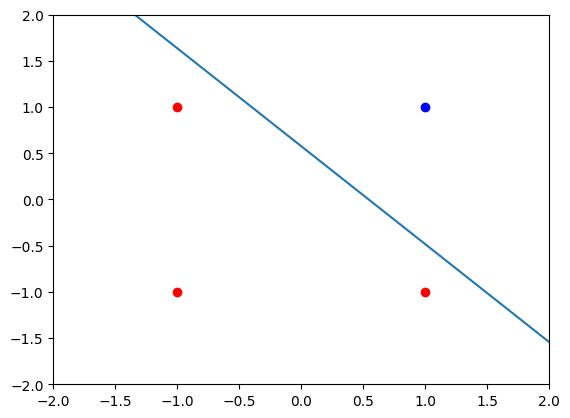

Output: [1, -1, -1, -1]
Epoch: 3
Target: (1, -1, -1, -1)
Accuracy: 1.0


In [ ]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, -1, -1, -1
w, epoch = adaline_fit(train, target, verbose=True, draw=True)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)

### OR Logic


Epoch 1
Bobot: [ 0.80210782  0.81941916 -0.05254623]


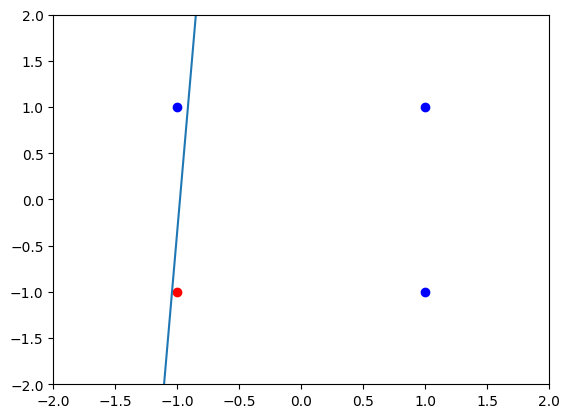

Bobot: [0.7347005  0.75201184 0.01486109]


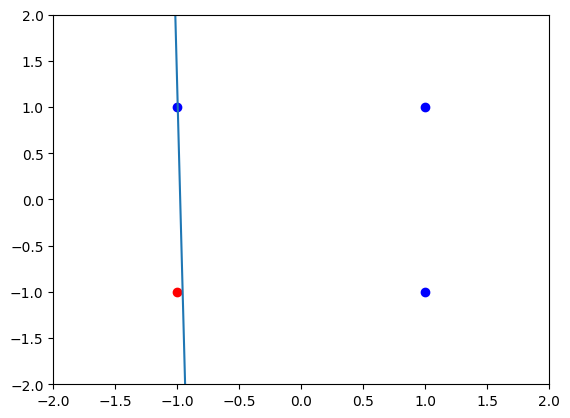

Bobot: [0.83494552 0.65176682 0.11510612]


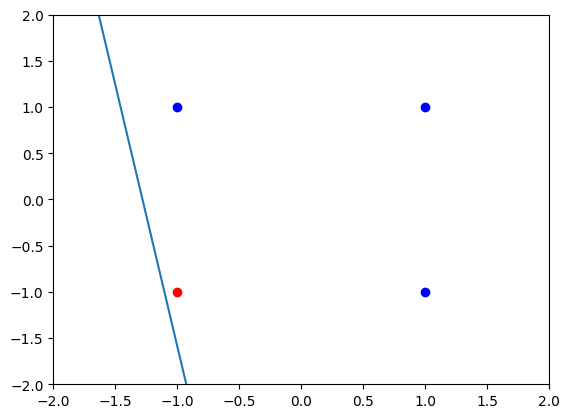

Bobot: [0.72813826 0.75857408 0.22191338]


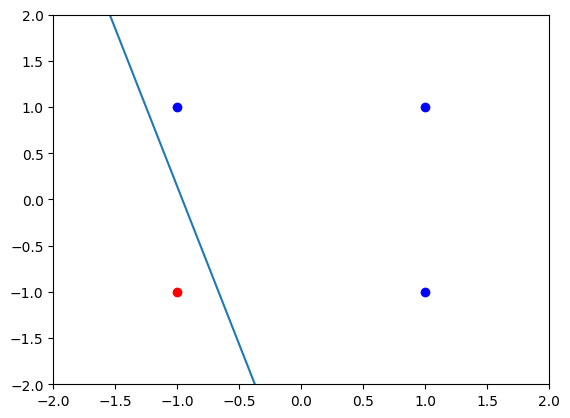


Epoch 2
Bobot: [0.65727569 0.6877115  0.1510508 ]


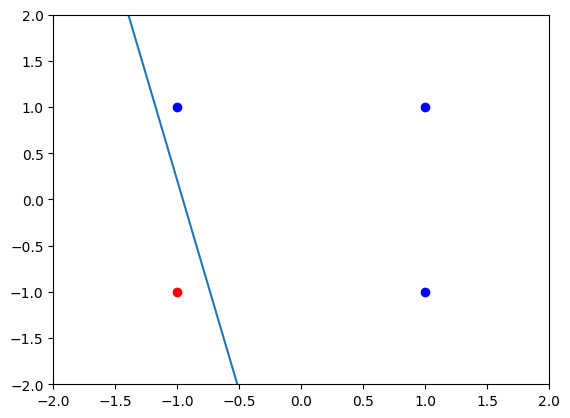

Bobot: [0.63788205 0.66831787 0.17044444]


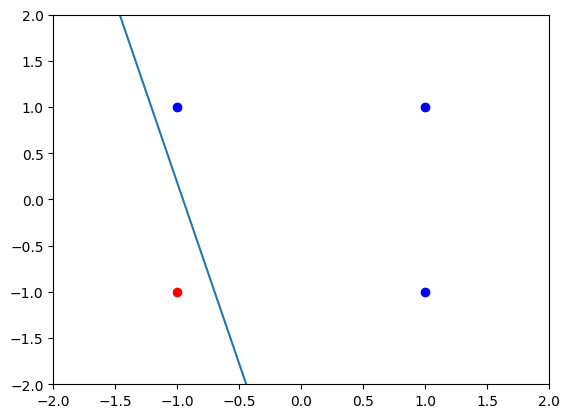

Bobot: [0.72388119 0.58231873 0.25644358]


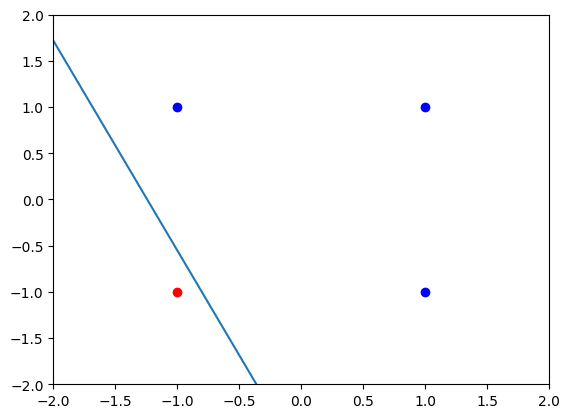

Bobot: [0.6353693  0.67083062 0.34495547]


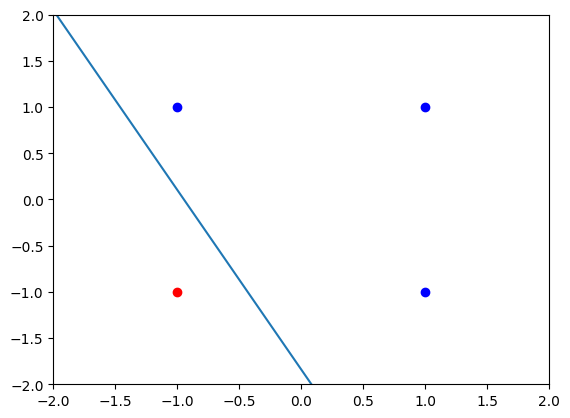

Output: [1, 1, 1, -1]
Epoch: 2
Target: (1, 1, 1, -1)
Accuracy: 1.0


In [ ]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, 1, 1, -1
w, epoch = adaline_fit(train, target, verbose=True, draw=True)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)

### AND NOT Logic


Epoch 1
Bobot: [ 0.0540619   0.30746247 -0.02996754]


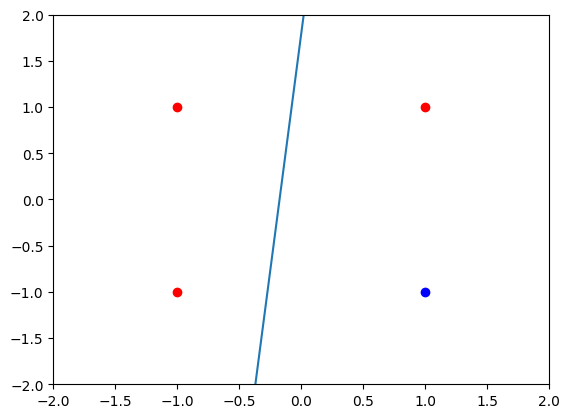

Bobot: [ 0.11491271  0.36831328 -0.09081835]


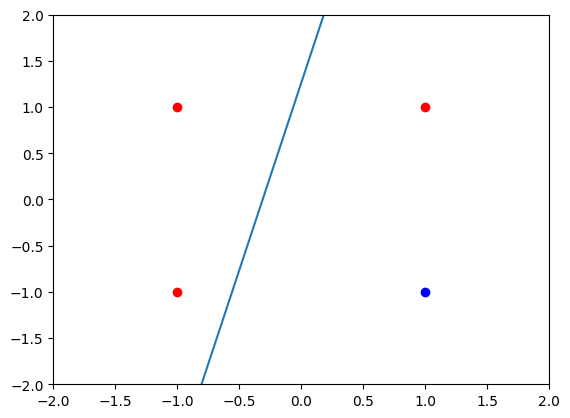

Bobot: [ 0.0493346   0.43389139 -0.15639646]


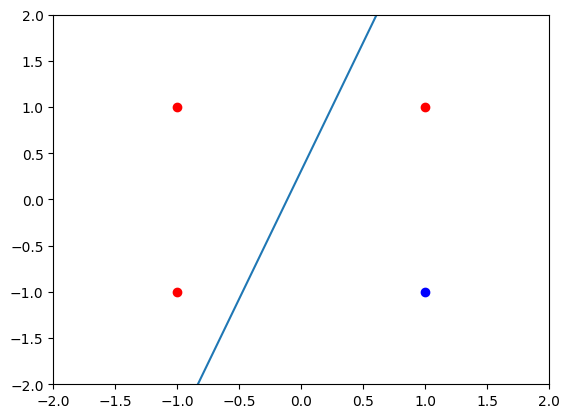

Bobot: [-0.02784936  0.51107536 -0.07921249]


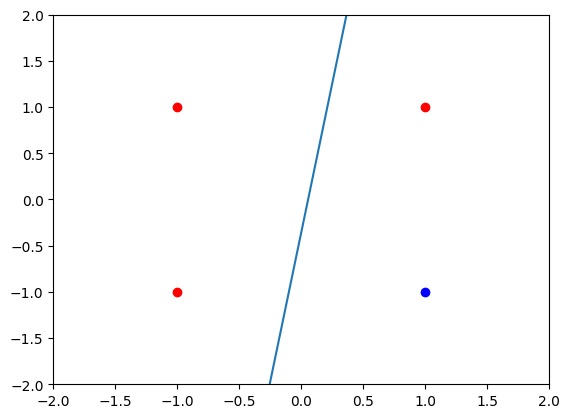


Epoch 2
Bobot: [-0.16825071  0.37067401 -0.21961384]


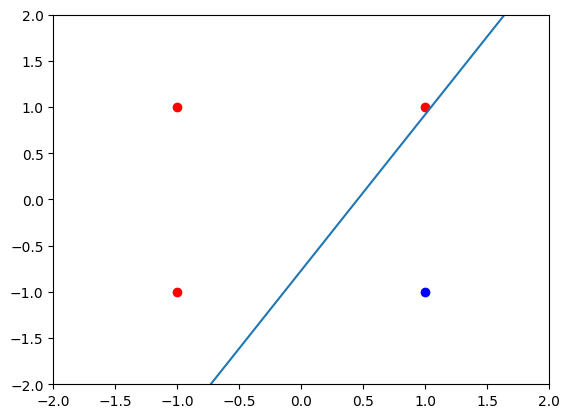

Bobot: [-0.11045443  0.42847029 -0.27741013]


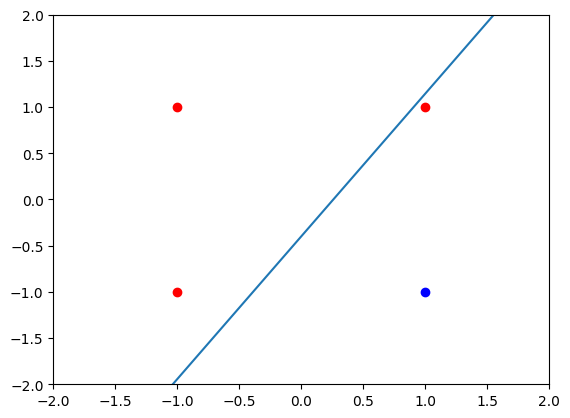

Bobot: [-0.12882094  0.44683681 -0.29577664]


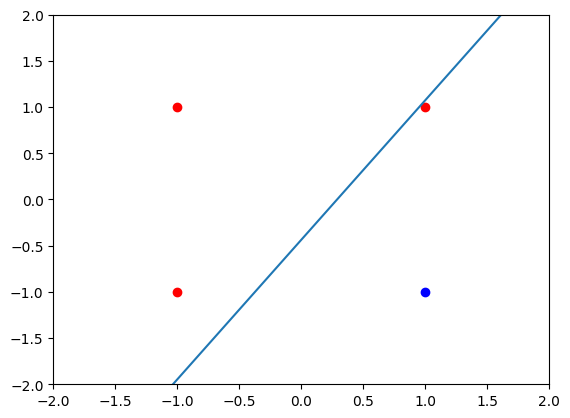

Bobot: [-0.20083283  0.5188487  -0.22376475]


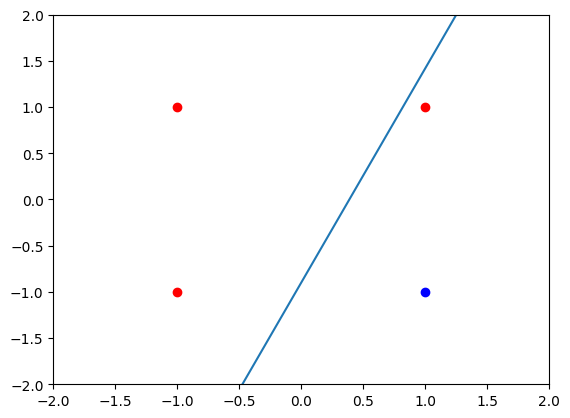


Epoch 3
Bobot: [-0.31025794  0.40942359 -0.33318986]


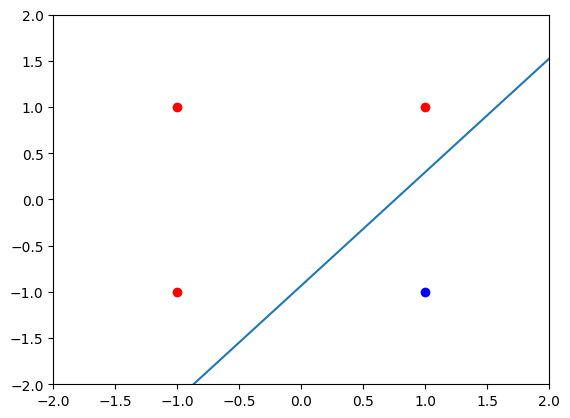

Bobot: [-0.25349349  0.46618803 -0.38995431]


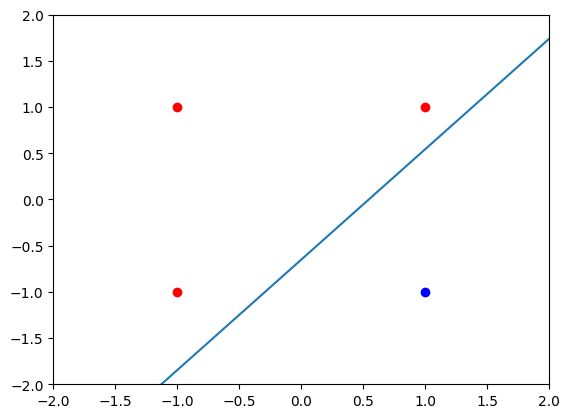

Bobot: [-0.24252991  0.45522445 -0.37899073]


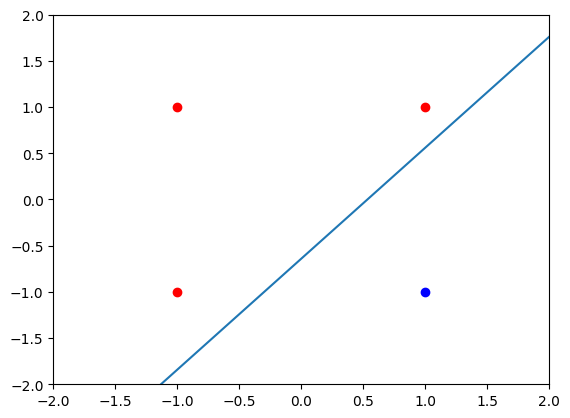

Bobot: [-0.31065355  0.52334809 -0.31086709]


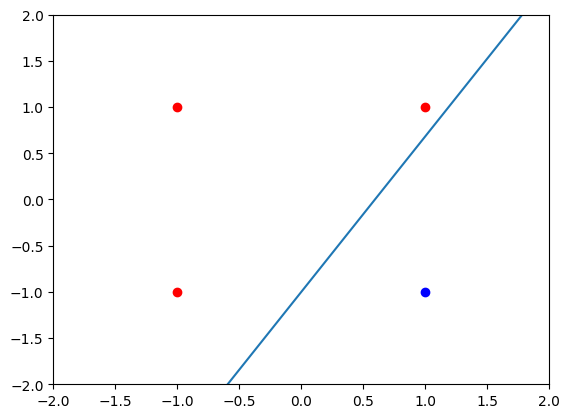


Epoch 4
Bobot: [-0.40083629  0.43316534 -0.40104984]


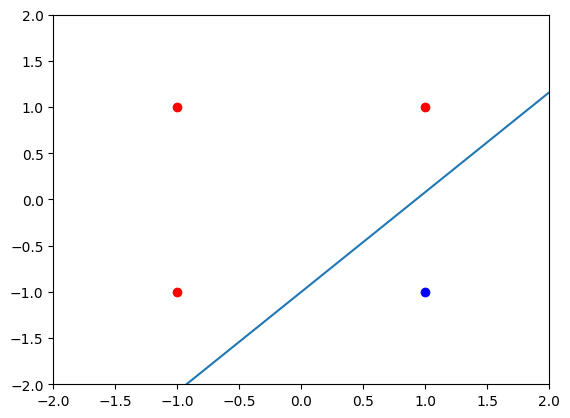

Bobot: [-0.34417418  0.48982745 -0.45771195]


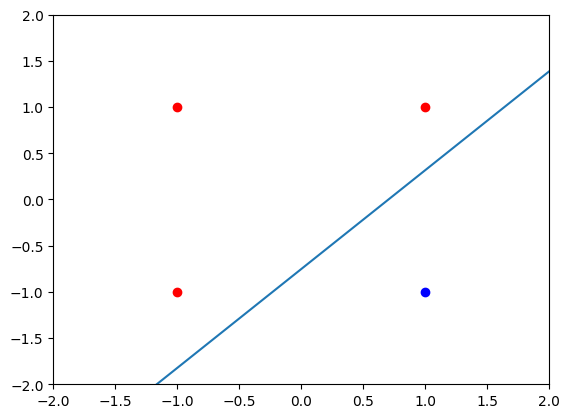

Bobot: [-0.31500282  0.4606561  -0.42854059]


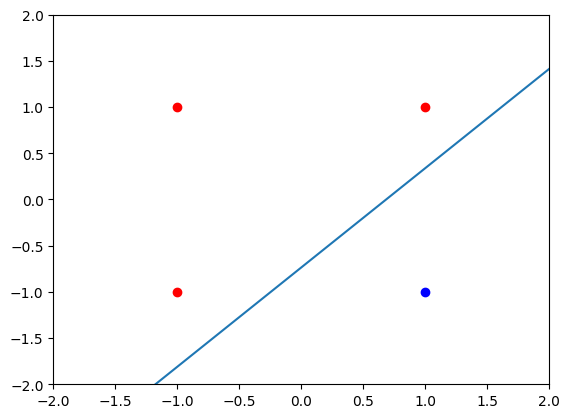

Bobot: [-0.38029099  0.52594426 -0.36325242]


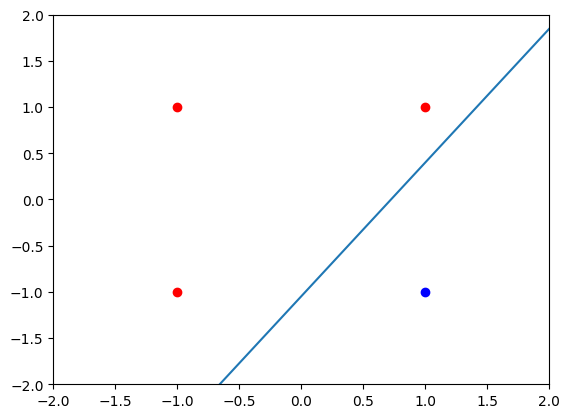

Output: [-1, 1, -1, -1]
Epoch: 4
Target: (-1, 1, -1, -1)
Accuracy: 1.0


In [ ]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, -1, -1
w, epoch = adaline_fit(train, target, verbose=True, draw=True)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)

### XOR Logic


Epoch 1
Bobot: [ 0.4309083   0.12552474 -0.05281411]


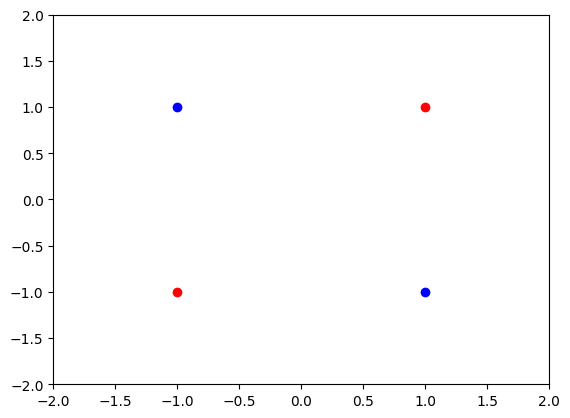

Bobot: [ 0.46998359  0.16460003 -0.0918894 ]


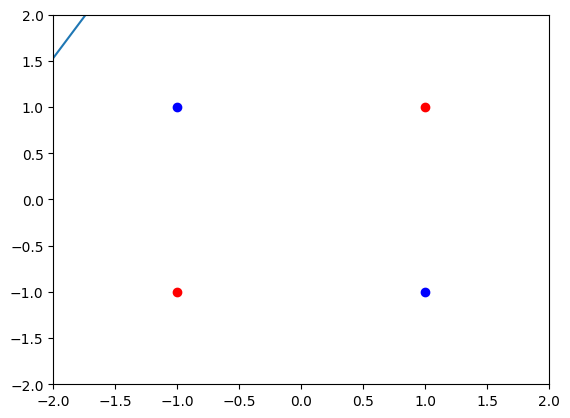

Bobot: [ 0.54863417  0.08594944 -0.01323882]


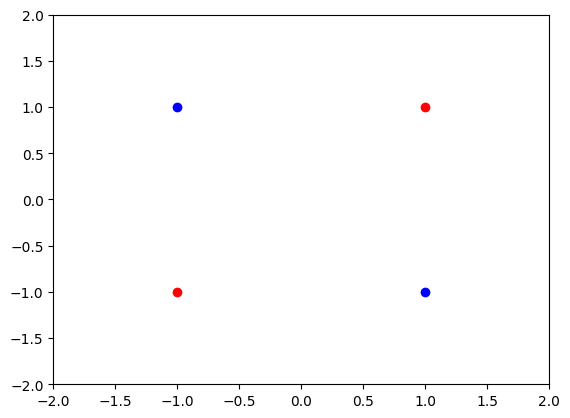

Bobot: [0.40104182 0.2335418  0.13435354]


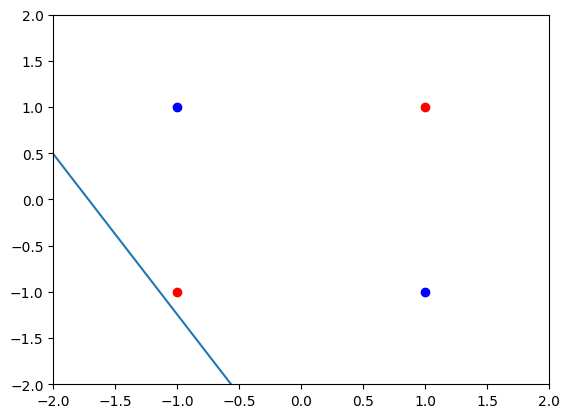


Epoch 2
Bobot: [ 0.2241481   0.05664808 -0.04254018]


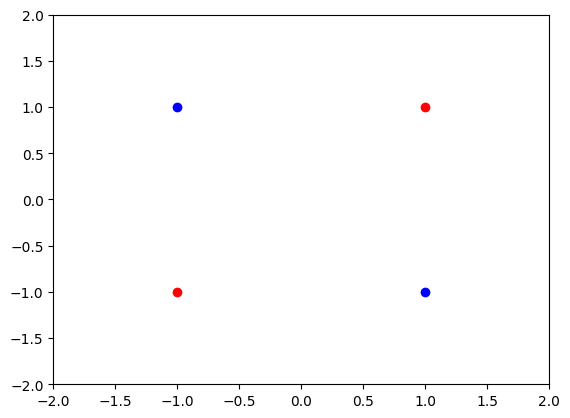

Bobot: [ 0.29181446  0.12431445 -0.11020654]


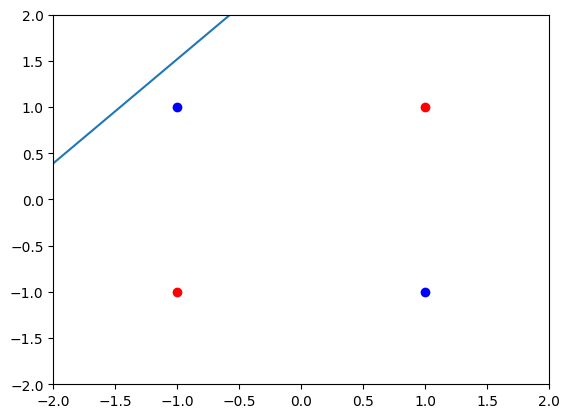

Bobot: [ 0.38608512  0.03004379 -0.01593589]


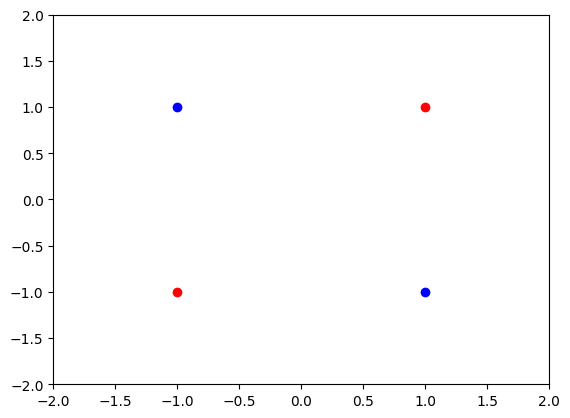

Bobot: [0.2488874  0.16724151 0.12126183]


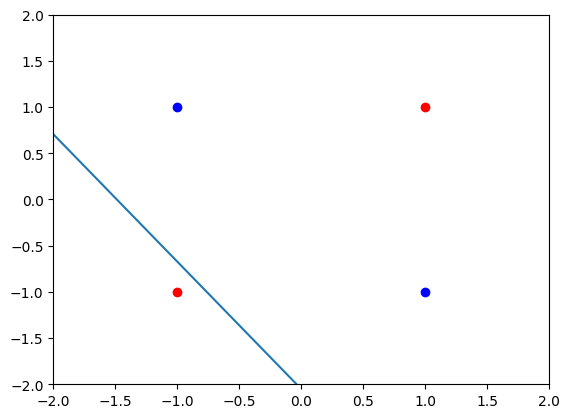


Epoch 3
Bobot: [ 0.09514832  0.01350244 -0.03247724]


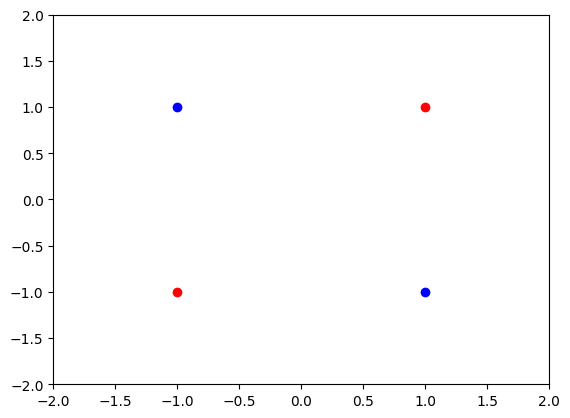

Bobot: [ 0.18103552  0.09938964 -0.11836444]


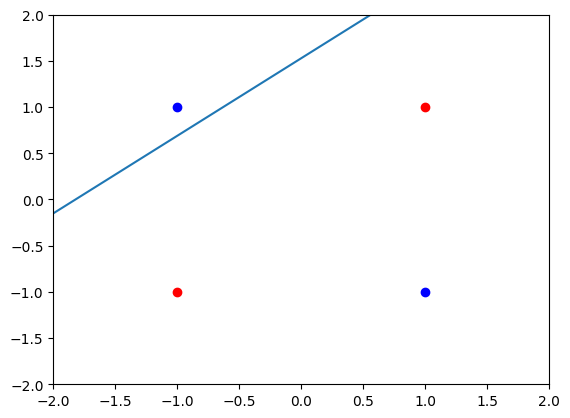

Bobot: [ 0.28470738 -0.00428222 -0.01469259]


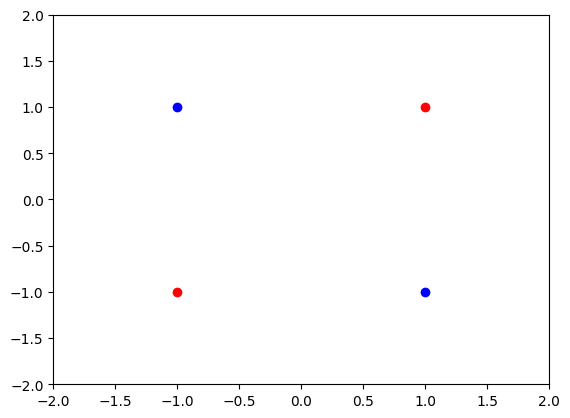

Bobot: [0.15433916 0.126086   0.11567563]


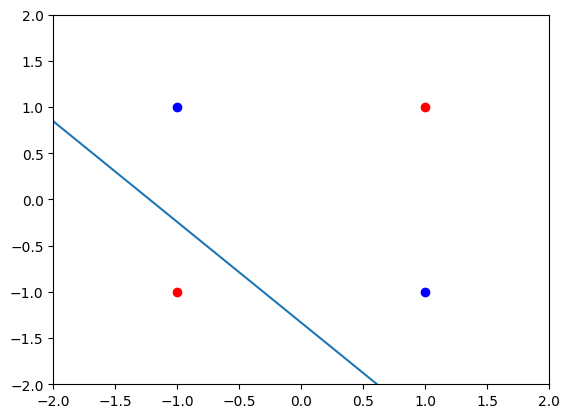


Epoch 4
Bobot: [ 0.01472908 -0.01352408 -0.02393445]


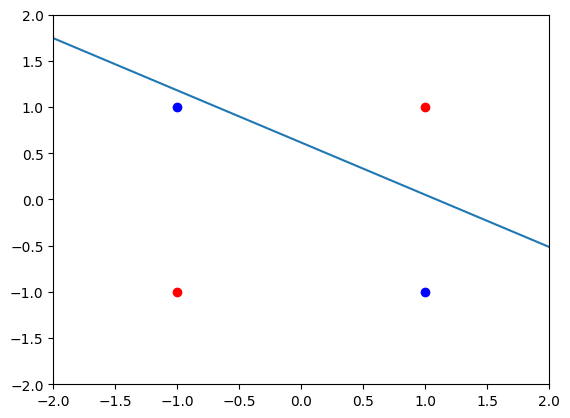

Bobot: [ 0.11221513  0.08396198 -0.1214205 ]


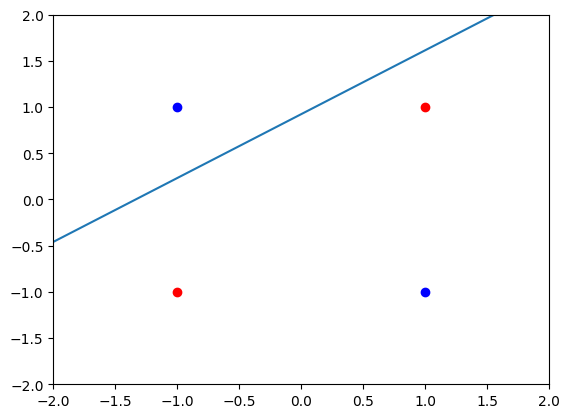

Bobot: [ 0.22153187 -0.02535476 -0.01210377]


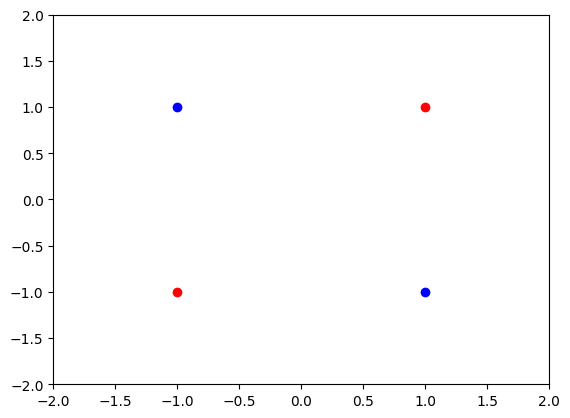

Bobot: [0.09563283 0.10054428 0.11379527]


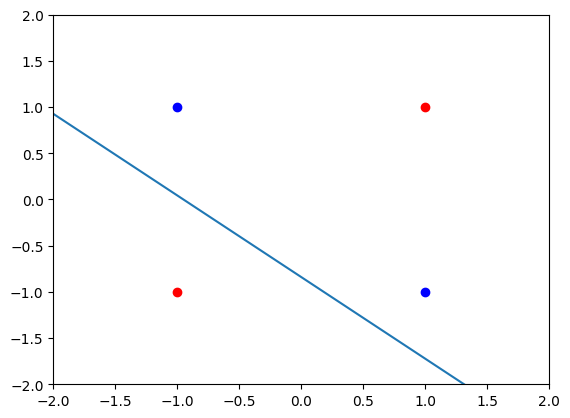


Epoch 5
Bobot: [-0.03536441 -0.03045296 -0.01720197]


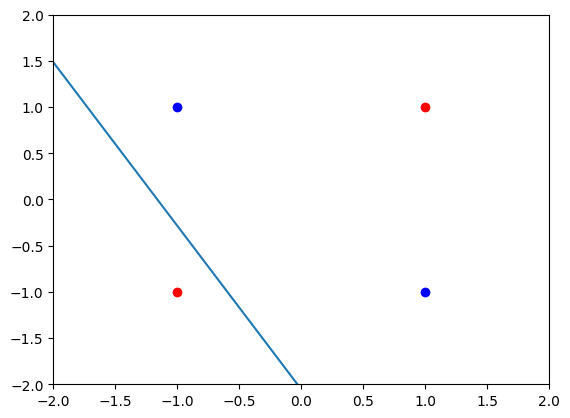

Bobot: [ 0.06949713  0.07440858 -0.12206351]


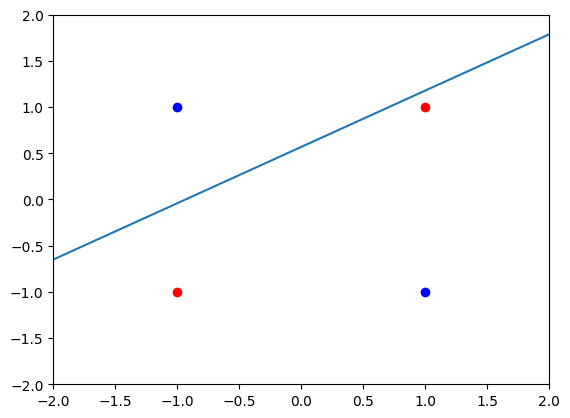

Bobot: [ 0.18219463 -0.03828891 -0.00936601]


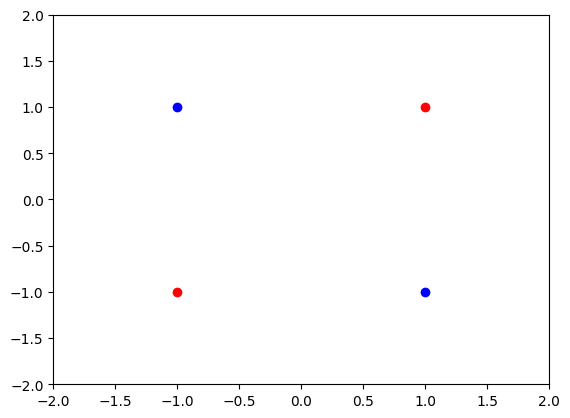

Bobot: [0.05920967 0.08469604 0.11361894]


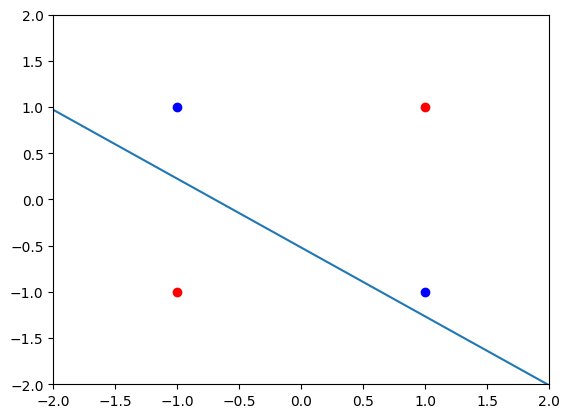


Epoch 6
Bobot: [-0.06654279 -0.04105642 -0.01213352]


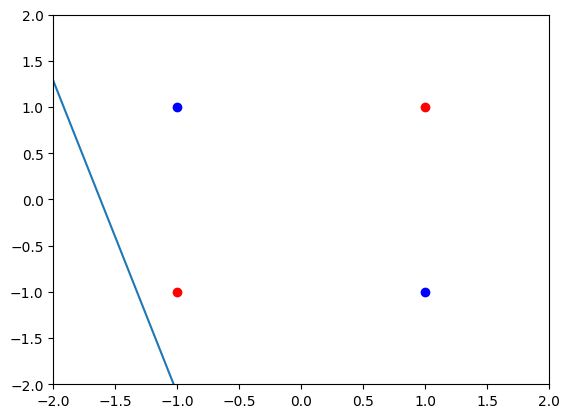

Bobot: [ 0.04300378  0.06849015 -0.12168009]


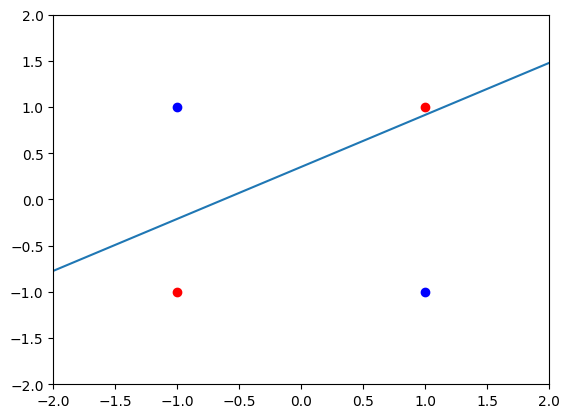

Bobot: [ 0.15772042 -0.0462265  -0.00696344]


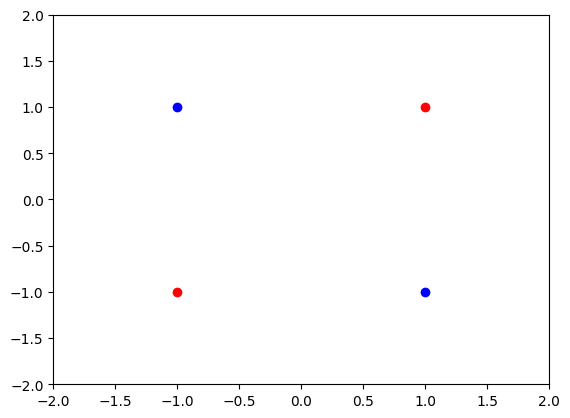

Bobot: [0.03662939 0.07486454 0.11412759]


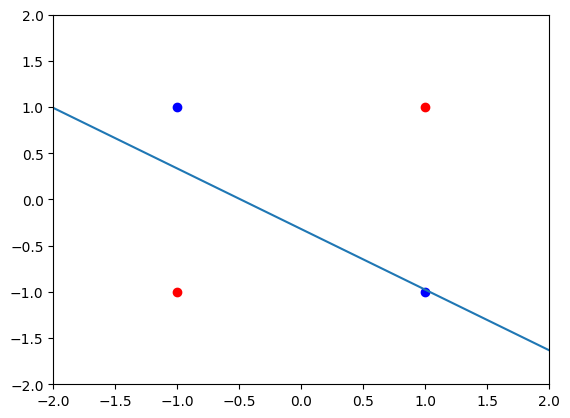


Epoch 7
Bobot: [-0.08593277 -0.04769761 -0.00843456]


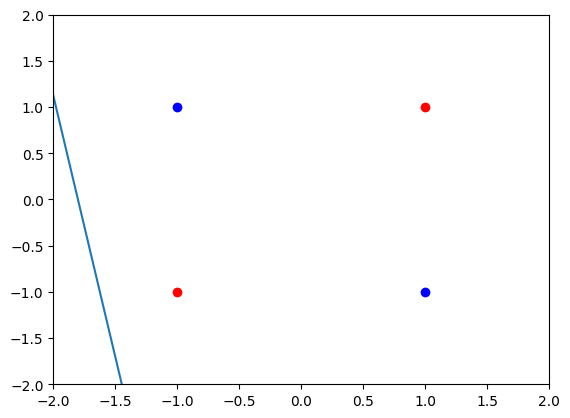

Bobot: [ 0.02658682  0.06482197 -0.12095414]


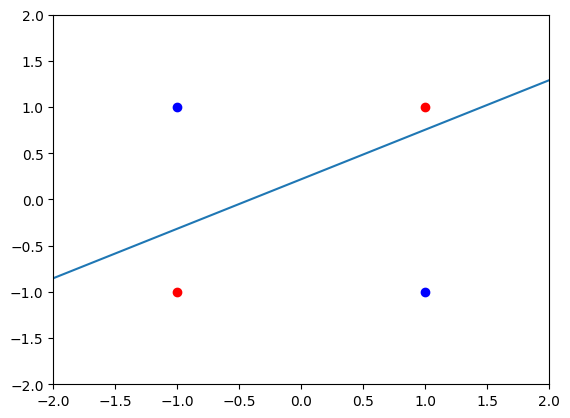

Bobot: [ 0.14250575 -0.05109696 -0.00503521]


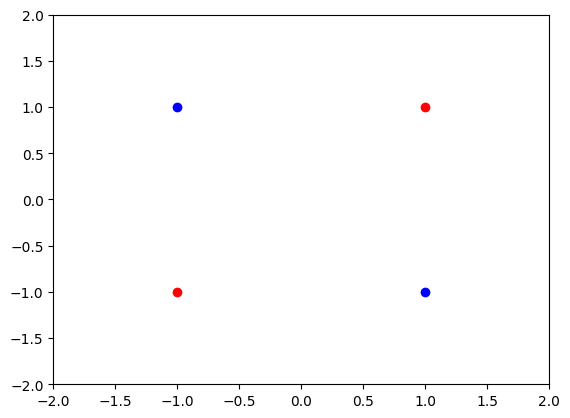

Bobot: [0.02264195 0.06876683 0.11482858]


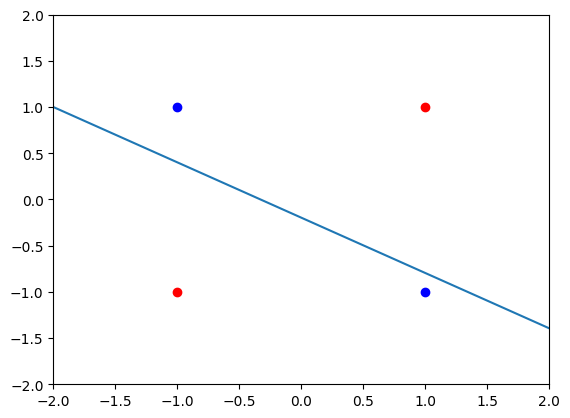


Epoch 8
Bobot: [-0.09798178 -0.05185691 -0.00579516]


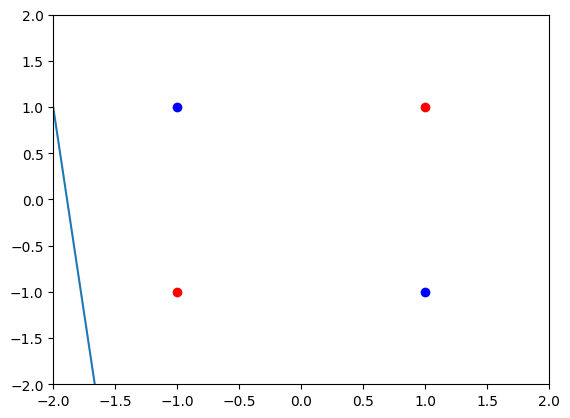

Bobot: [ 0.01642257  0.06254745 -0.12019951]


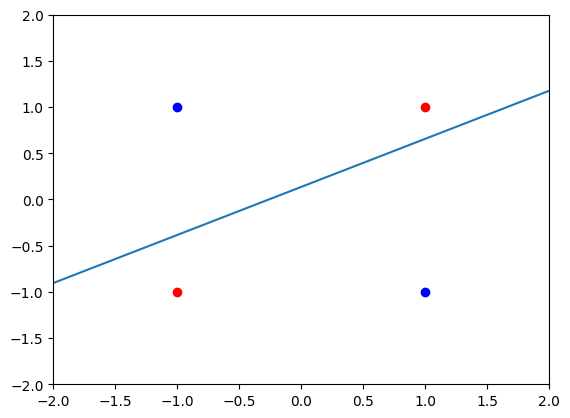

Bobot: [ 0.13305501 -0.05408499 -0.00356707]


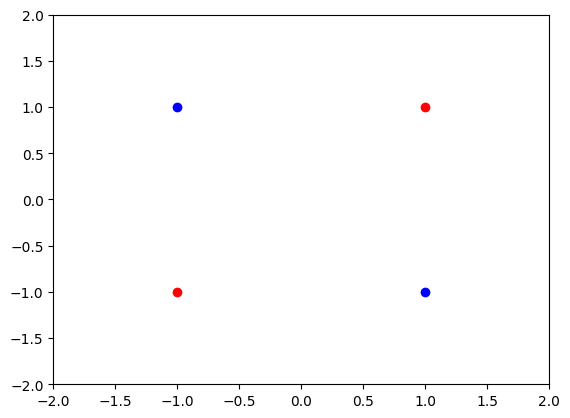

Bobot: [0.0139843  0.06498572 0.11550364]


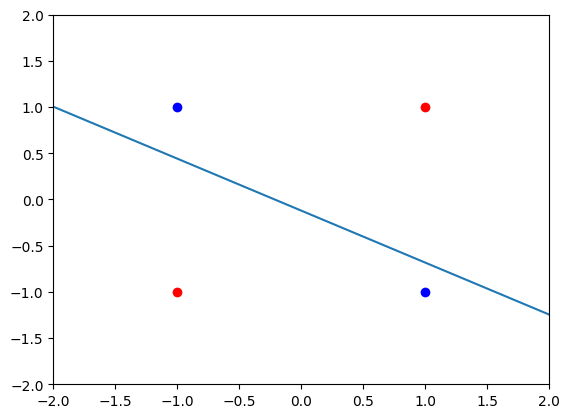


Epoch 9
Bobot: [-0.10546306 -0.05446165 -0.00394373]


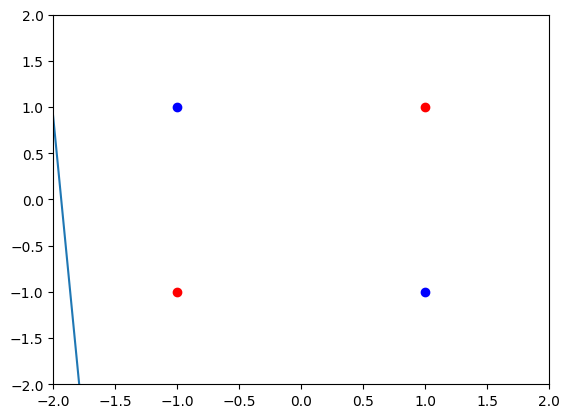

Bobot: [ 0.01013503  0.06113645 -0.11954183]


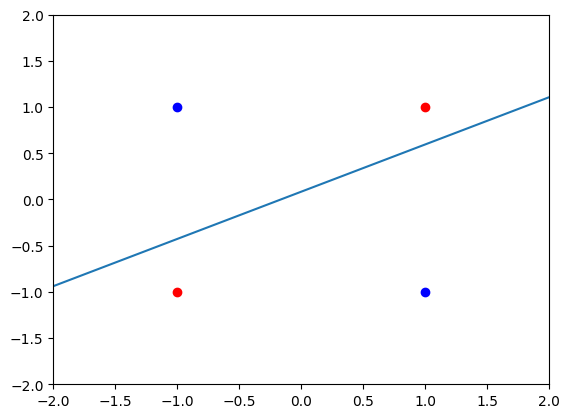

Bobot: [ 0.12718936 -0.05591788 -0.0024875 ]


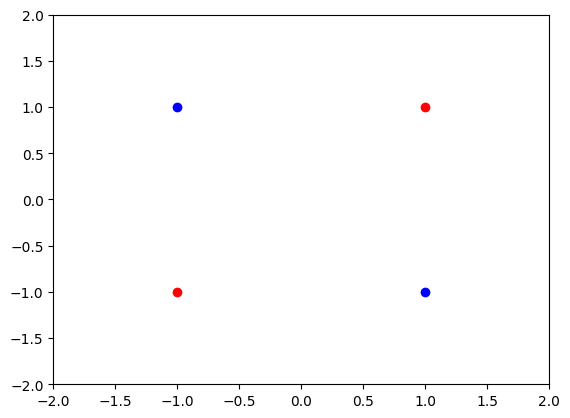

Bobot: [0.00862989 0.0626416  0.11607197]


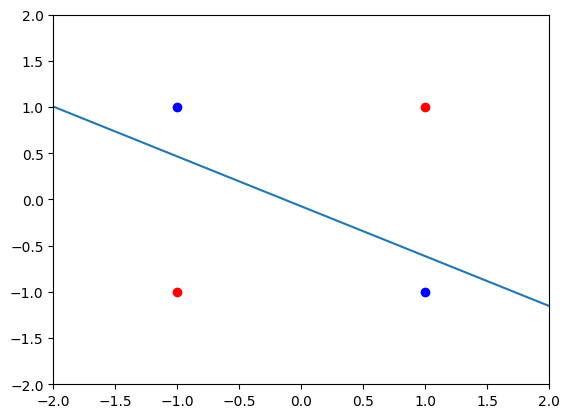


Epoch 10
Bobot: [-0.11010446 -0.05609275 -0.00266238]


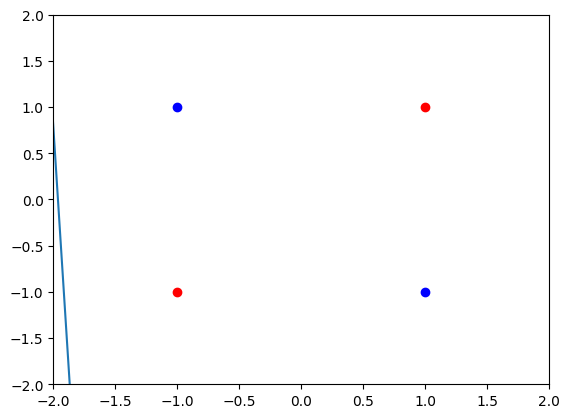

Bobot: [ 0.00624902  0.06026074 -0.11901586]


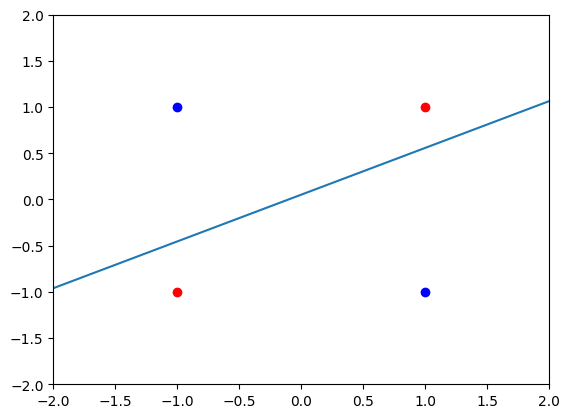

Bobot: [ 0.12355178 -0.05704202 -0.0017131 ]


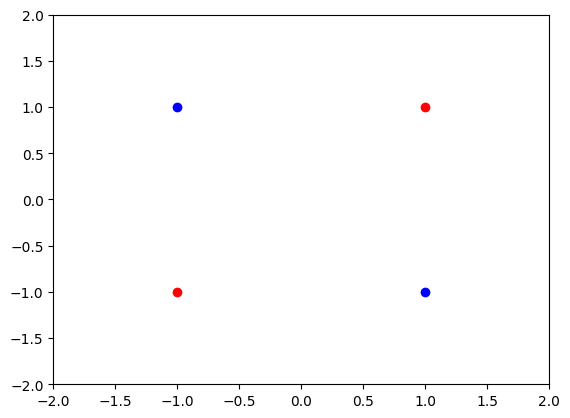

Bobot: [0.00532109 0.06118867 0.11651759]


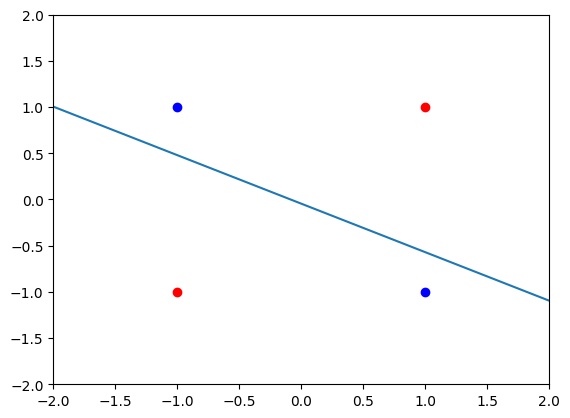


Epoch 11
Bobot: [-0.11298164 -0.05711407 -0.00178515]


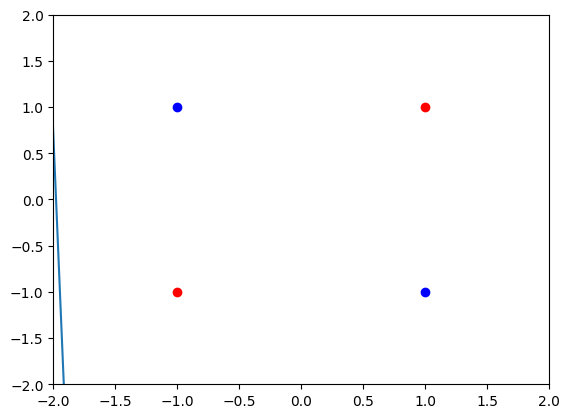

Bobot: [ 0.00384941  0.05971699 -0.1186162 ]


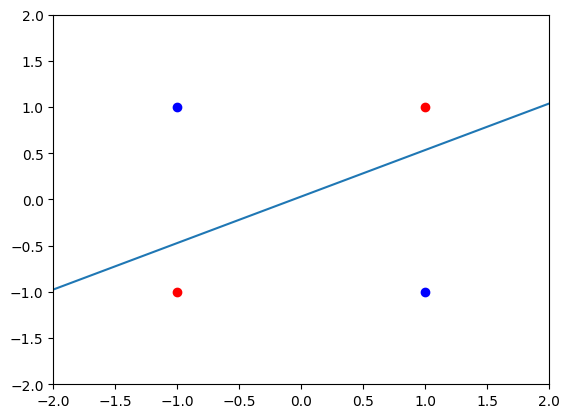

Bobot: [ 0.12129779 -0.05773139 -0.00116782]


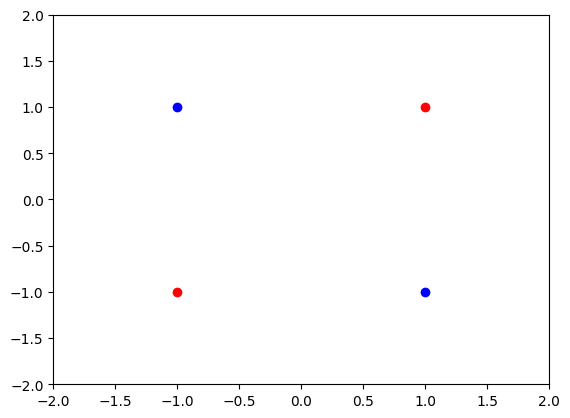

Bobot: [0.00327809 0.06028831 0.11685188]


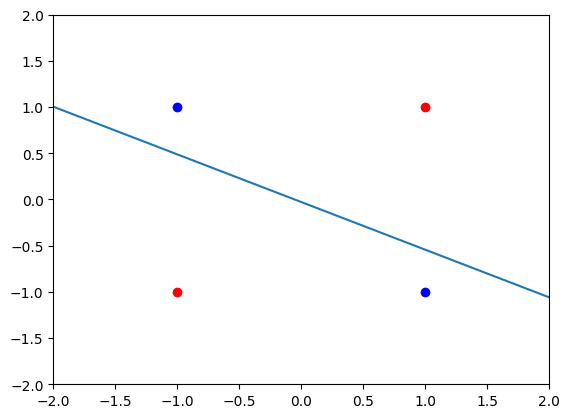


Epoch 12
Bobot: [-0.11476374 -0.05775352 -0.00118995]


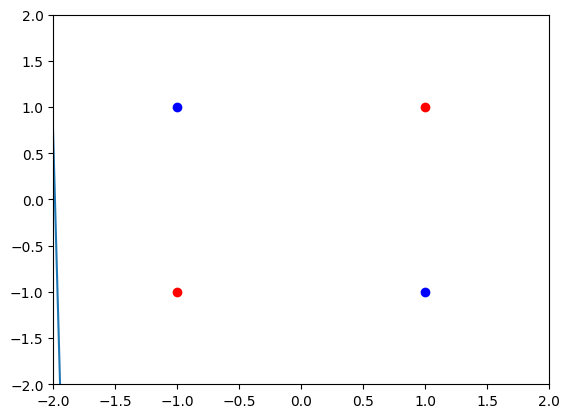

Bobot: [ 0.00236899  0.05937922 -0.11832268]


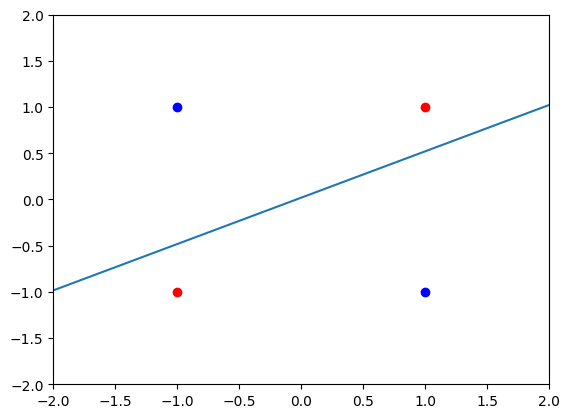

Bobot: [ 0.11990228 -0.05815408 -0.00078939]


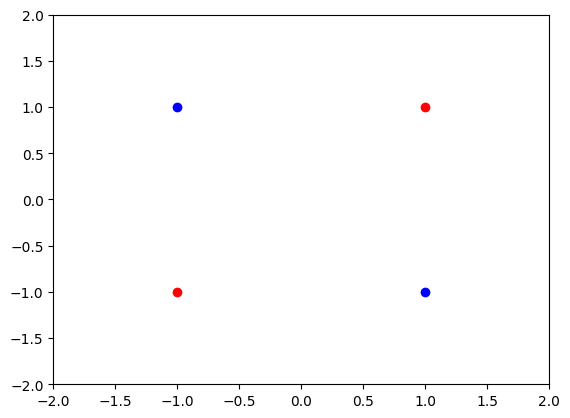

Bobot: [0.00201771 0.0597305  0.11709518]


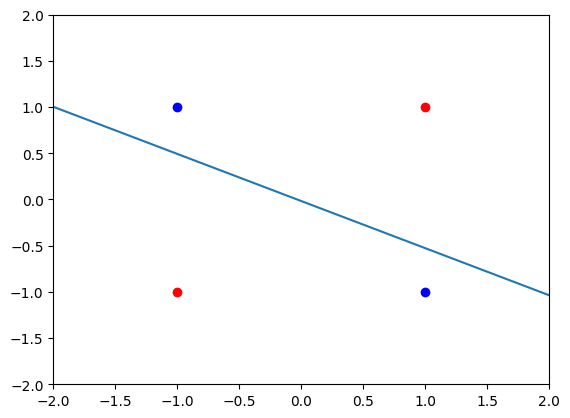


Epoch 13
Bobot: [-0.11586663 -0.05815384 -0.00078916]


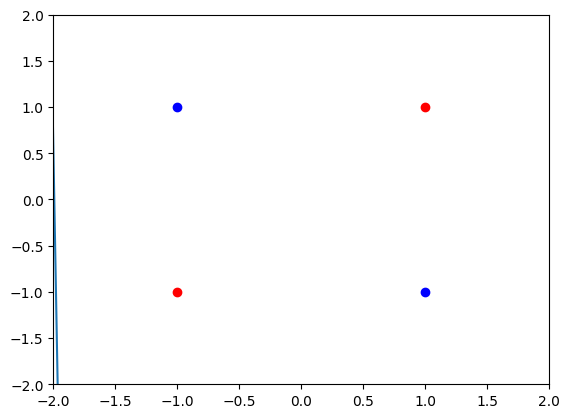

Bobot: [ 0.0014565   0.05916929 -0.11811229]


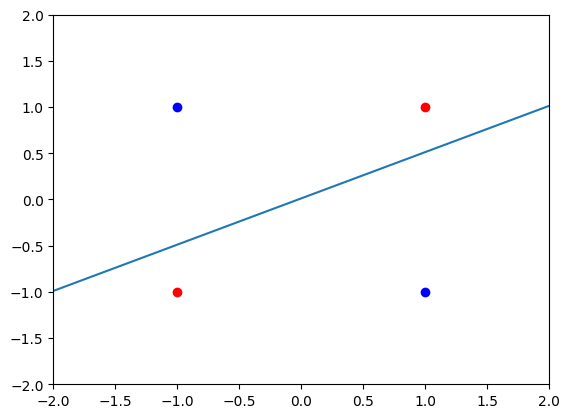

Bobot: [ 0.11903901 -0.05841322 -0.00052978]


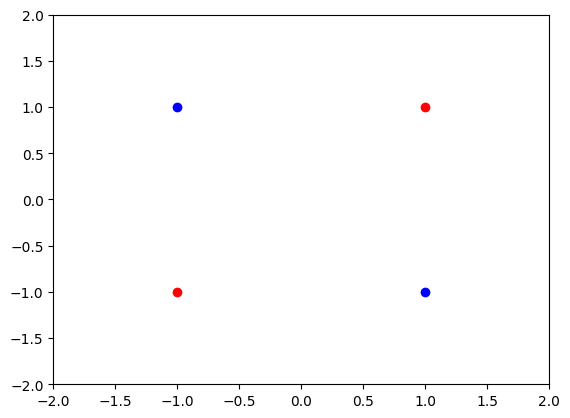

Bobot: [0.00124081 0.05938498 0.11726842]


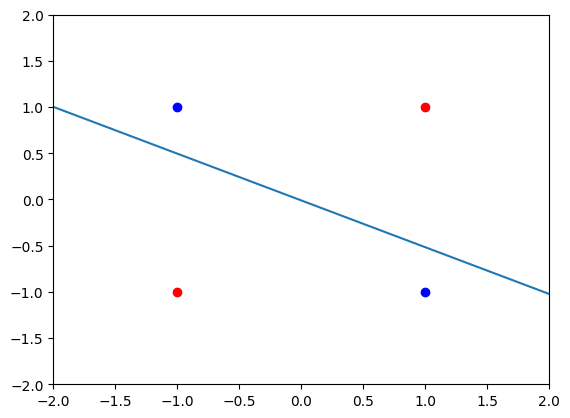


Epoch 14
Bobot: [-0.11654861 -0.05840444 -0.000521  ]


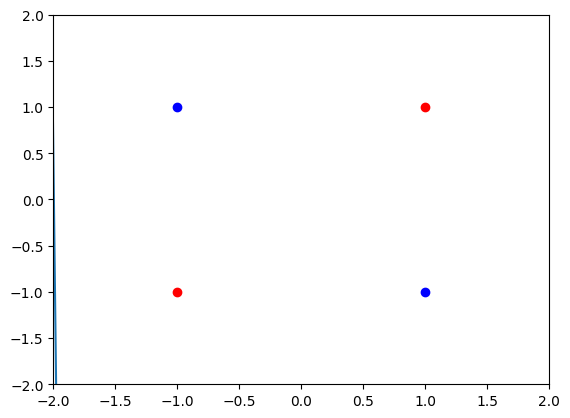

Bobot: [ 0.00089459  0.05903877 -0.11796421]


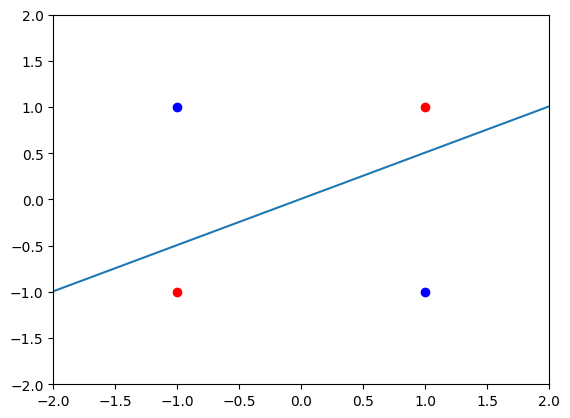

Bobot: [ 0.11850543 -0.05857207 -0.00035337]


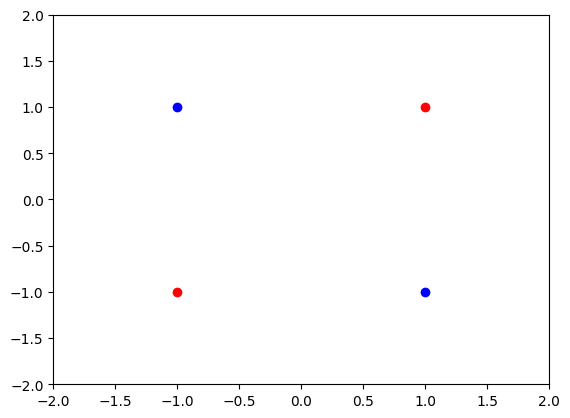

Bobot: [0.00076234 0.05917102 0.11738972]


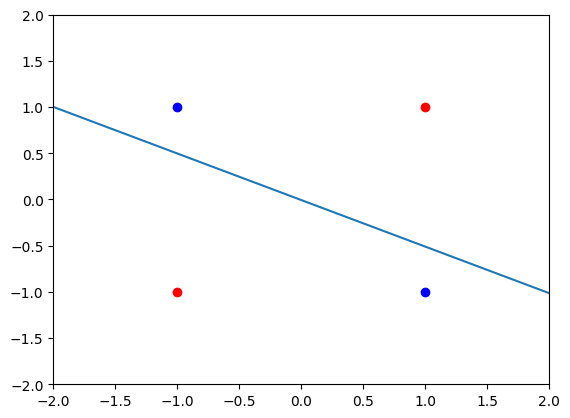


Epoch 15
Bobot: [-0.11696997 -0.05856129 -0.00034259]


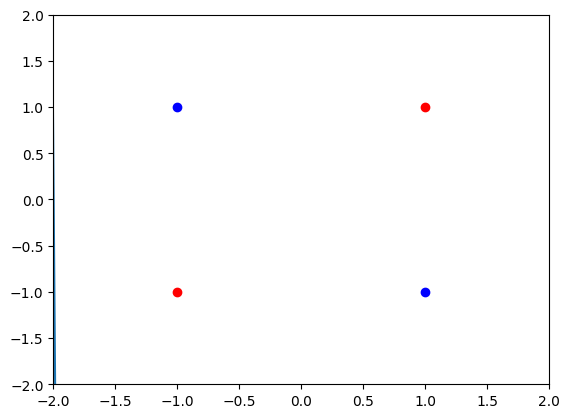

Bobot: [ 0.0005489   0.05895758 -0.11786146]


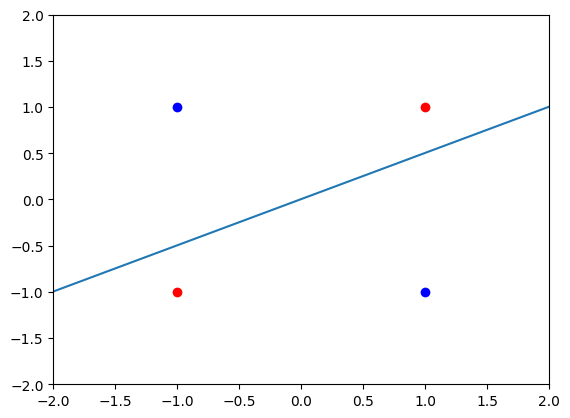

Bobot: [ 0.11817591 -0.05866944 -0.00023444]


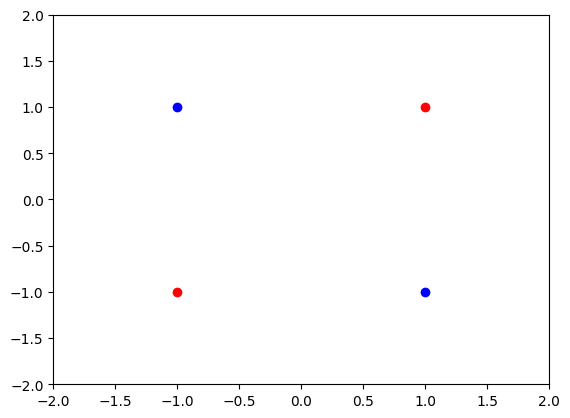

Bobot: [0.00046794 0.05903854 0.11747354]


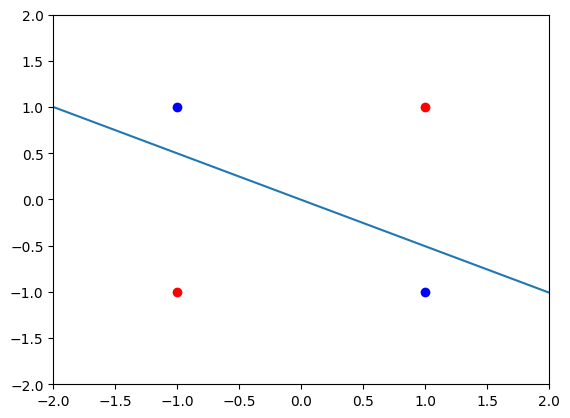


Epoch 16
Bobot: [-0.11723007 -0.05865946 -0.00022446]


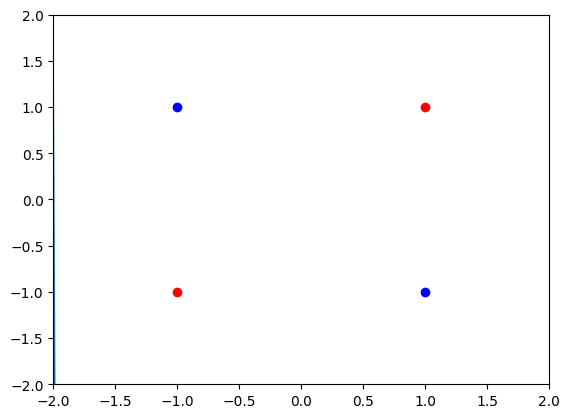

Bobot: [ 0.00033644  0.05890705 -0.11779097]


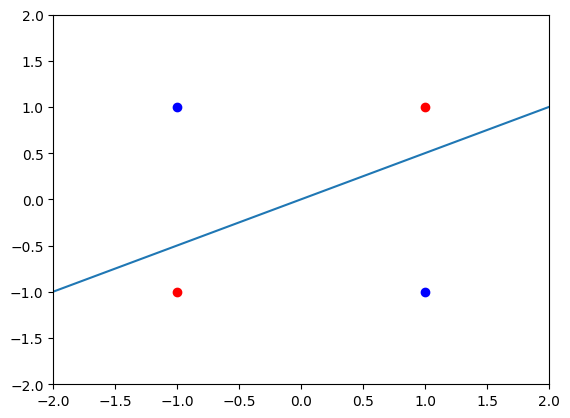

Bobot: [ 0.1179726  -0.05872911 -0.00015481]


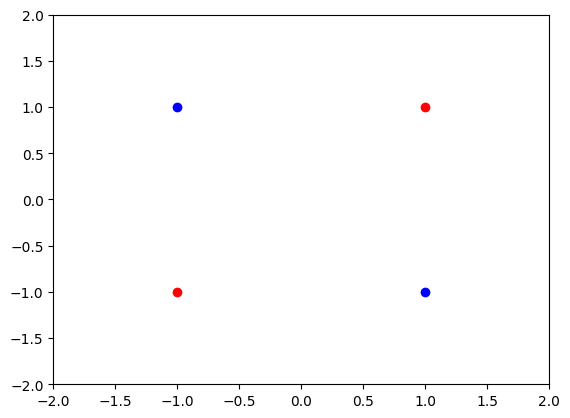

Bobot: [0.00028695 0.05895654 0.11753084]


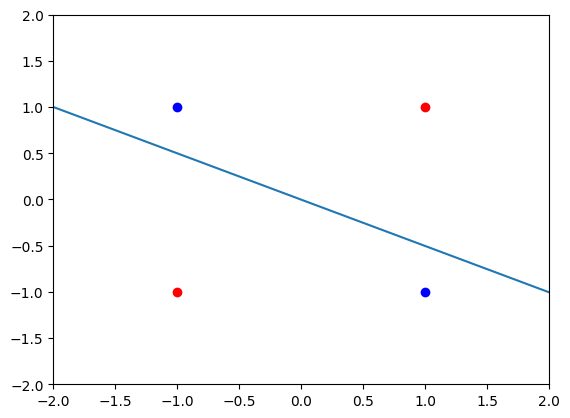


Epoch 17
Bobot: [-0.11739049 -0.05872089 -0.00014659]


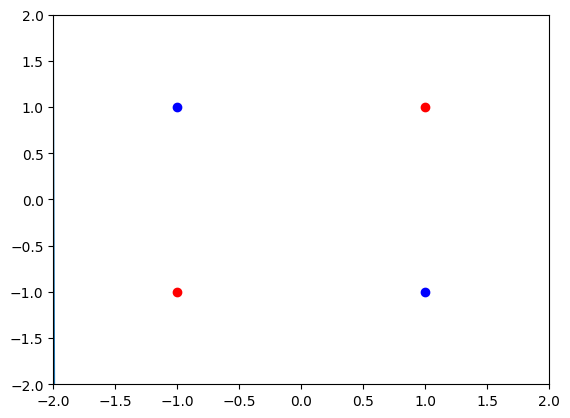

Bobot: [ 0.00020599  0.05887559 -0.11774307]


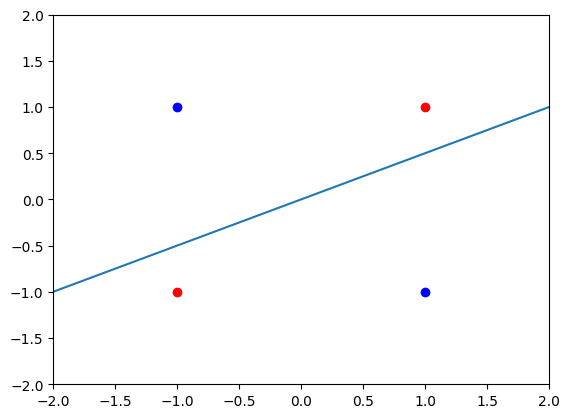

Bobot: [ 1.17847258e-01 -5.87656797e-02 -1.01804956e-04]


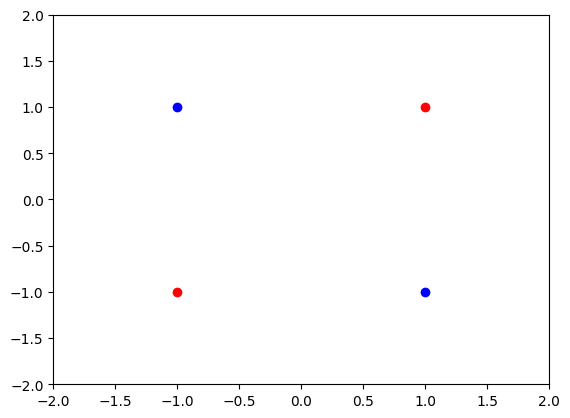

Bobot: [0.00017578 0.05890579 0.11756967]


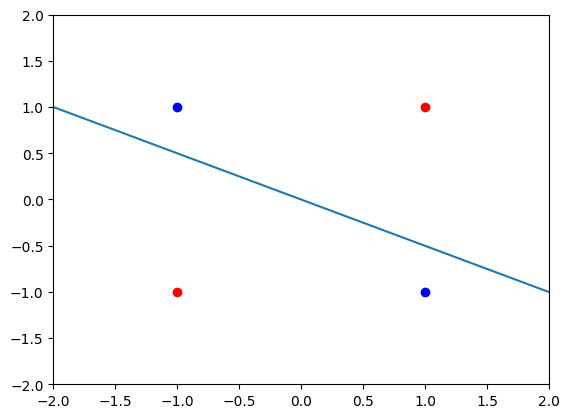


Epoch 18
Bobot: [-1.17489341e-01 -5.87593302e-02 -9.54554608e-05]


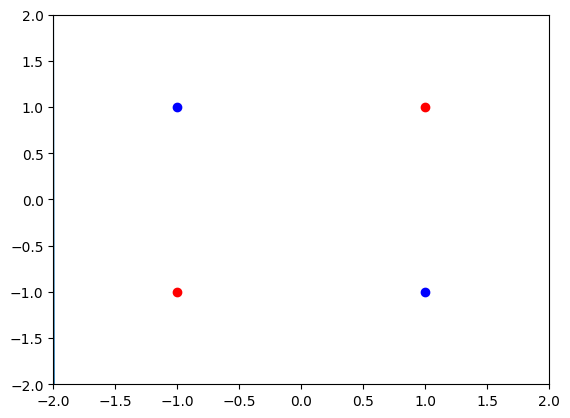

Bobot: [ 0.00012598  0.05885599 -0.11771078]


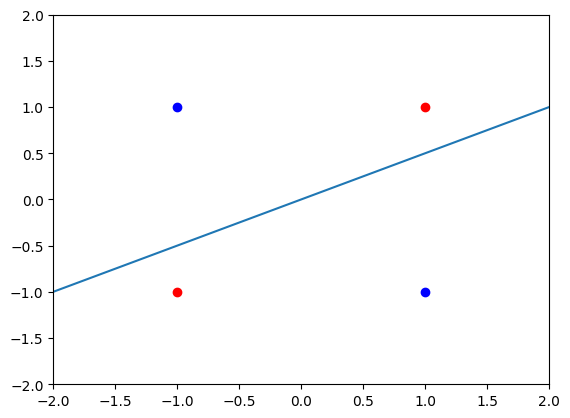

Bobot: [ 1.17770059e-01 -5.87880874e-02 -6.66982455e-05]


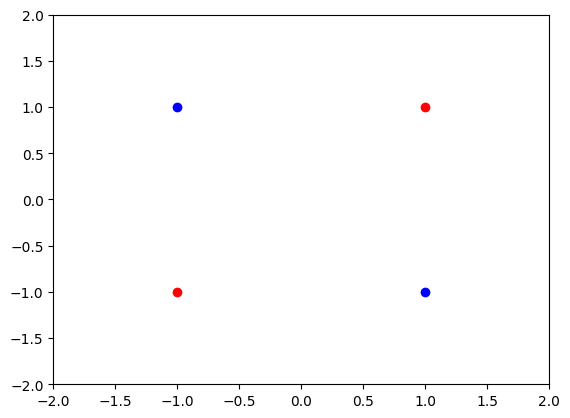

Bobot: [1.07574938e-04 5.88743971e-02 1.17595786e-01]


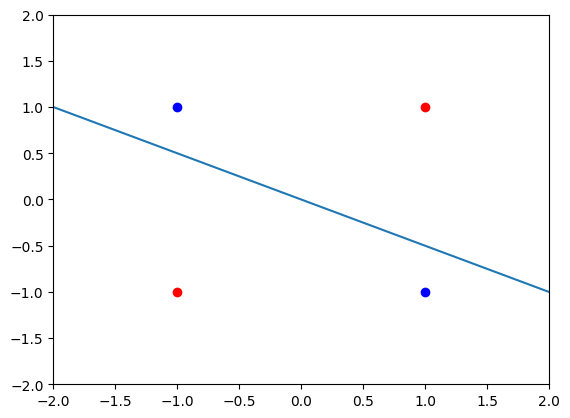


Epoch 19
Bobot: [-1.17550201e-01 -5.87833787e-02 -6.19895712e-05]


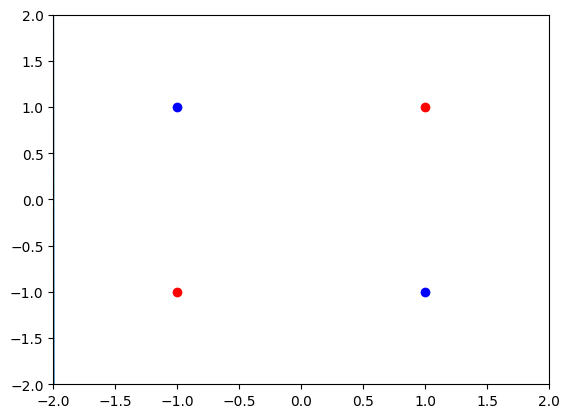

Bobot: [ 7.69581083e-05  5.88437803e-02 -1.17689149e-01]


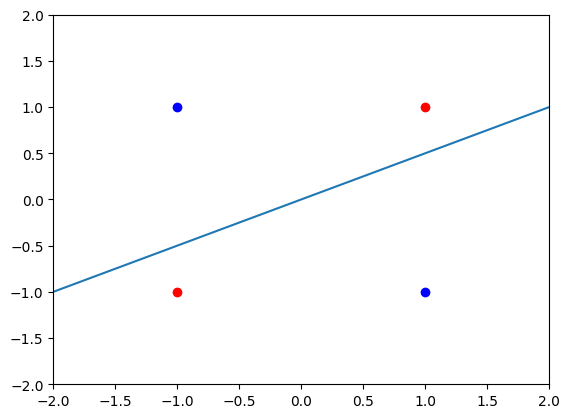

Bobot: [ 1.17722555e-01 -5.88018168e-02 -4.35514977e-05]


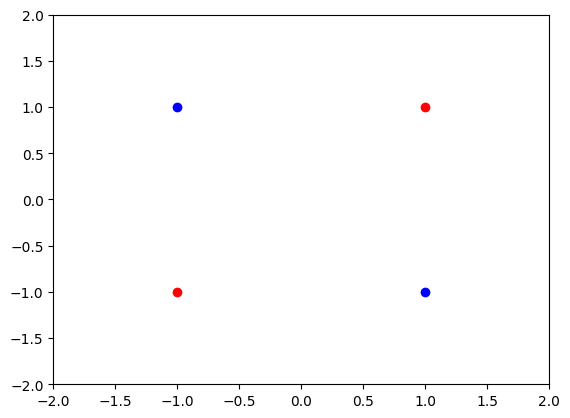

Bobot: [6.57628386e-05 5.88549756e-02 1.17613241e-01]


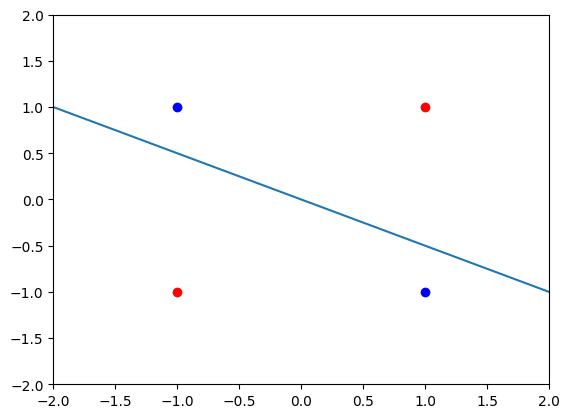


Epoch 20
Bobot: [-1.17587635e-01 -5.87984224e-02 -4.01570771e-05]


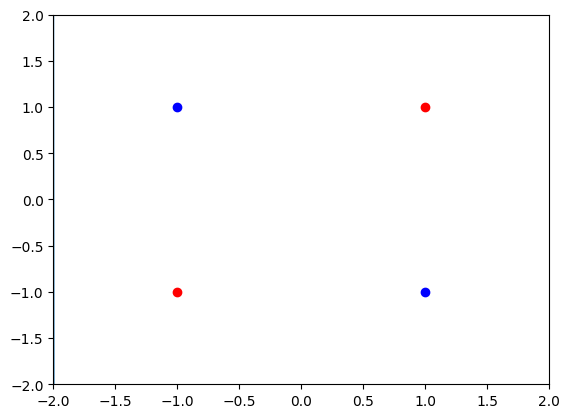

Bobot: [ 4.69549499e-05  5.88361677e-02 -1.17674747e-01]


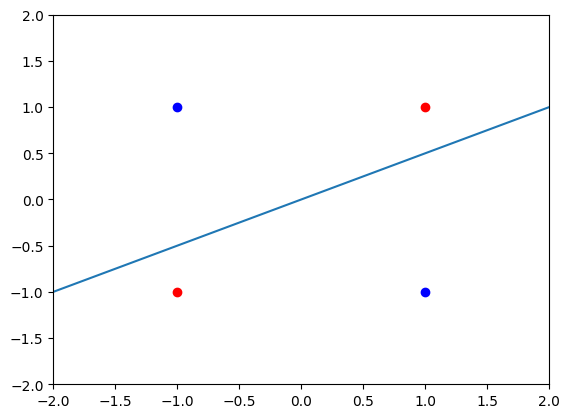

Bobot: [ 1.17693351e-01 -5.88102283e-02 -2.83511296e-05]


KeyboardInterrupt: 

In [ ]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, 1, -1
w, epoch = adaline_fit(train, target, verbose=True, draw=True)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)

XOR Logic don't work